<a href="https://colab.research.google.com/github/AnnetVasileva/machineLearning/blob/main/Practical%202/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score, matthews_corrcoef
from sklearn.svm import SVC

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# read in data
path = '/content/drive/MyDrive/ML_ECO/'
pickle_file = 'data_set.pkl'

with open(path + pickle_file, 'rb') as f:
  train_set =pickle.load(f) 

X = train_set['X']
y = train_set['y']
X.shape

(31369, 482)

In [42]:
# split data
X_train, X_valid, y_train, y_valid = train_test_split( X, y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    stratify = y)


In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': [500],
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
rf=RandomForestClassifier(random_state=42, n_jobs = -1, class_weight = 'balanced')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=10, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 27.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [45]:
y_pred = rf_random.best_estimator_.predict(X_valid)
accuracy_score(y_valid, y_pred)
average_precision_score(y_valid, y_pred)
#matthews_corrcoef(y_valid, y_pred)

0.04893210073318457

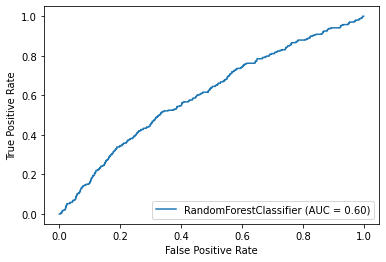

In [46]:
sklearn.metrics.plot_roc_curve(rf_random.best_estimator_, X_valid, y_valid)  
plt.show()    

In [ ]:
# MODEL
rfc=RandomForestClassifier(random_state=42, n_jobs = -1, class_weight = 'balanced')

param_grid = { 
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose = 2)

CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_